<a href="https://colab.research.google.com/github/NisiniNadara/BugBusters/blob/main/Anomaly_detector_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn

In [2]:
print("Hello, I am ready")


Hello, I am ready


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("sensor.csv")

In [5]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [6]:
df.shape

(220320, 55)

In [7]:
df['machine_status'].value_counts()

,count
machine_status,
NORMAL,205836
RECOVERING,14477
BROKEN,7


In [8]:
df['binary_label'] = df['machine_status'].apply(
    lambda x: 1 if x == 'NORMAL' else 0
)

In [9]:
df['binary_label'].value_counts()

,count
binary_label,
1,205836
0,14484


In [10]:
X = df.drop(columns=['machine_status', 'binary_label'])
y = df['binary_label']

In [11]:
X.shape, y.shape

((220320, 54), (220320,))

In [12]:
X = X.select_dtypes(include='number')

In [13]:
X.shape

(220320, 53)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, shuffle=False
)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((132192, 53), (88128, 53), (132192,), (88128,))

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [18]:
# Remove columns that are completely NaN
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test[X_train.columns]

In [19]:
X_train.isna().sum().sum()

np.int64(0)

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
import pandas as pd

real_time_data = pd.DataFrame([{
    'sensor_04': 12.3,
    'sensor_10': 0.85,
    'sensor_11': 47.9,
    'sensor_12': 3.2,
    'sensor_50': 102.1
}])

In [23]:
import numpy as np
import pandas as pd

# Create empty row with all training columns
real_time_full = pd.DataFrame(
    np.zeros((1, X_train.shape[1])),
    columns=X_train.columns
)

In [24]:
# Handle NaNs the same way
real_time_full = real_time_full.fillna(X_train.mean())

In [25]:
import numpy as np
import pandas as pd

def predict_pump_status(sensor_values_dict):

    # 1. Create full feature row (same as training)
    X_full = pd.DataFrame(
        np.zeros((1, X_train.shape[1])),
        columns=X_train.columns
    )

    # 2. Insert provided sensor values
    for sensor, value in sensor_values_dict.items():
        if sensor in X_full.columns:
            X_full.loc[0, sensor] = value

    # 3. Handle missing values
    X_full = X_full.fillna(X_train.mean())

    # 4. Apply feature selection
    X_selected = selector.transform(X_full)

    # 5. Predict
    prediction = model.predict(X_selected)[0]
    probability = model.predict_proba(X_selected)[0]

    # 6. Interpret result
    if prediction == 1:
        status = "NORMAL"
    else:
        status = "ANOMALY"

    return status, probability

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [27]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

print("✅ Feature selection completed!")
print("X_train_sel shape:", X_train_sel.shape)
print("X_test_sel shape:", X_test_sel.shape)

smote = SMOTE(k_neighbors=3, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_sel, y_train)

print("\n✅ SMOTE completed!")
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_sm).value_counts())

model = LogisticRegression(max_iter=1000)
model.fit(X_train_sm, y_train_sm)

print("\n✅ Model training completed!")

✅ Feature selection completed!
X_train_sel shape: (132192, 5)
X_test_sel shape: (88128, 5)

✅ SMOTE completed!
Before SMOTE:
 binary_label
1    122065
0     10127
Name: count, dtype: int64
After SMOTE:
 binary_label
1    122065
0    122065
Name: count, dtype: int64

✅ Model training completed!


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_sel)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 4335    22]
 [  683 83088]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4357
           1       1.00      0.99      1.00     83771

    accuracy                           0.99     88128
   macro avg       0.93      0.99      0.96     88128
weighted avg       0.99      0.99      0.99     88128



In [29]:
status, prob = predict_pump_status({
    'sensor_04': 634.375,
    'sensor_10': 37.2274,
    'sensor_11': 47.52422,
    'sensor_12': 31.11716,
    'sensor_50': 243.0556
})

print("Status:", status)
print("Probabilities [Anomaly, Normal]:", prob)

Status: NORMAL
Probabilities [Anomaly, Normal]: [0.00136069 0.99863931]


In [30]:
status, prob = predict_pump_status({
    'sensor_04': 50000.0,
    'sensor_10': 50000.0,
    'sensor_11': 50000.0,
    'sensor_12': 50000.0,
    'sensor_50': 102.1
})

print("Status:", status)
print("Probabilities [Anomaly, Normal]:", prob)

Status: NORMAL
Probabilities [Anomaly, Normal]: [0. 1.]


In [31]:
status, prob = predict_pump_status({
    'sensor_04': 1237508456579.7589,
    'sensor_10': 1237508456579.758,
    'sensor_11': 1237508456579.758,
    'sensor_12': 3.2,
    'sensor_50': 1237508456579.758
})

print("Status:", status)
print("Probabilities [Anomaly, Normal]:", prob)

Status: NORMAL
Probabilities [Anomaly, Normal]: [0. 1.]


In [32]:
status, prob = predict_pump_status({
    'sensor_04': 1237508456579.7589,
    'sensor_10': 1237508456579.758,
    'sensor_11': 1237508456579.758,
    'sensor_12': 3.2,
    'sensor_50': 1237508456579.758
})

print("Status:", status)
print("Probabilities [Anomaly, Normal]:", prob)

Status: NORMAL
Probabilities [Anomaly, Normal]: [0. 1.]


In [33]:
status, prob = predict_pump_status({
    'sensor_04': 0000000000.7589,
    'sensor_10': 00.758,
    'sensor_11': 00000000000000000.758,
    'sensor_12': 0.2,
    'sensor_50': 000.758
})

print("Status:", status)
print("Probabilities [Anomaly, Normal]:", prob)

Status: ANOMALY
Probabilities [Anomaly, Normal]: [9.99651293e-01 3.48707487e-04]


RUL Prediction Model (Regression)

In [34]:
import pandas as pd
import numpy as np

df_rul = pd.read_csv("rul_hrs.csv")
print(df_rul.shape)
df_rul.head()

(166441, 53)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [35]:
# remove unwanted index column
if "Unnamed: 0" in df_rul.columns:
    df_rul = df_rul.drop(columns=["Unnamed: 0"])

# convert timestamp
df_rul["timestamp"] = pd.to_datetime(df_rul["timestamp"])

# sort
df_rul = df_rul.sort_values("timestamp").reset_index(drop=True)

df_rul.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [36]:
target_col = "rul"
feature_cols_rul = [c for c in df_rul.columns if c.startswith("sensor_")]

X_rul = df_rul[feature_cols_rul].copy()
y_rul = df_rul[target_col].copy()

print("No of sensor features:", len(feature_cols_rul))
print("X_rul shape:", X_rul.shape)
print("y_rul shape:", y_rul.shape)

No of sensor features: 50
X_rul shape: (166441, 50)
y_rul shape: (166441,)


In [37]:
# fill missing values using mean
X_rul = X_rul.fillna(X_rul.mean())

In [38]:
split_ratio = 0.8
split_index = int(len(X_rul) * split_ratio)

X_rul_train = X_rul.iloc[:split_index]
X_rul_test  = X_rul.iloc[split_index:]

y_rul_train = y_rul.iloc[:split_index]
y_rul_test  = y_rul.iloc[split_index:]

print(X_rul_train.shape, X_rul_test.shape)

(133152, 50) (33289, 50)


In [39]:
from sklearn.preprocessing import StandardScaler

rul_scaler = StandardScaler()

X_rul_train_scaled = rul_scaler.fit_transform(X_rul_train)
X_rul_test_scaled  = rul_scaler.transform(X_rul_test)

In [40]:
def create_sequences(X, y, seq_len=60):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
    return np.array(Xs), np.array(ys)

SEQ_LEN = 60

X_rul_train_seq, y_rul_train_seq = create_sequences(X_rul_train_scaled, y_rul_train.values, SEQ_LEN)
X_rul_test_seq, y_rul_test_seq = create_sequences(X_rul_test_scaled, y_rul_test.values, SEQ_LEN)

print("Train seq:", X_rul_train_seq.shape, y_rul_train_seq.shape)
print("Test seq :", X_rul_test_seq.shape, y_rul_test_seq.shape)

Train seq: (133092, 60, 50) (133092,)
Test seq : (33229, 60, 50) (33229,)


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

rul_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_rul_train_seq.shape[1], X_rul_train_seq.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation="relu", kernel_regularizer=l2(0.001)),
    Dense(1)
])

rul_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
rul_model.summary()

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = rul_model.fit(
    X_rul_train_seq, y_rul_train_seq,
    validation_split=0.2,
    epochs=60,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,401 (165.63 KB)

 Trainable params: 42,401 (165.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 143s 83ms/step - loss: 123270.7188 - mae: 276.4685 - val_loss: 108712.1562 - val_mae: 299.3770
Epoch 2/60
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 140s 82ms/step - loss: 10397.6758 - mae: 74.9039 - val_loss: 71377.2969 - val_mae: 223.1651
Epoch 3/60
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 137s 82ms/step - loss: 4379.8066 - mae: 47.5763 - val_loss: 79569.9141 - val_mae: 233.9821
Epoch 4/60
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 160s 93ms/step - loss: 3256.6257 - mae: 40.3479 - val_loss: 94130.6016 - val_mae: 262.5220
Epoch 5/60
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 183s 82ms/step - loss: 2722.7566 - mae: 36.3385 - val_loss: 108323.9453 - val_mae: 288.9852
Epoch 6/60
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 146s 88ms/step - loss: 2617.7461 - mae: 34.2381 - val_loss: 96161.3359 - val_mae: 267.0811
Epoch 7/60
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 146s 88ms/step - loss: 1901.7925 - mae: 30.0658 - val_loss: 99698.9922 - val_mae: 277.3463


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_rul_pred = rul_model.predict(X_rul_test_seq, verbose=0).flatten()

rmse = np.sqrt(mean_squared_error(y_rul_test_seq, y_rul_pred))
mae = mean_absolute_error(y_rul_test_seq, y_rul_pred)

print("RUL Test RMSE:", rmse)
print("RUL Test MAE :", mae)

RUL Test RMSE: 305.2405014736021
RUL Test MAE : 246.7458714868233


In [43]:
anomaly_model = LogisticRegression(max_iter=1000)
anomaly_model.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [44]:
SEQ_LEN = 60
sensor_buffer = []  # store last 60 rows for RUL prediction

def predict_pump_status_and_rul(sensor_values_dict):
    """
    Input: dictionary of sensor values (can be partial)
    Output: Pump status + predicted RUL
    """

    # 1) Build full row for anomaly model (X_train columns)

    anomaly_row = pd.DataFrame(np.zeros((1, X_train.shape[1])), columns=X_train.columns)

    for sensor, value in sensor_values_dict.items():
        if sensor in anomaly_row.columns:
            anomaly_row.loc[0, sensor] = value

    anomaly_row = anomaly_row.fillna(X_train.mean())

    # feature selection
    anomaly_selected = selector.transform(anomaly_row)

    # anomaly prediction
    pred = anomaly_model.predict(anomaly_selected)[0]
    prob = anomaly_model.predict_proba(anomaly_selected)[0]

    pump_status = "NORMAL" if pred == 1 else "ANOMALY"

    # 2) Build full row for RUL model (feature_cols_rul)

    rul_row = pd.DataFrame(np.zeros((1, len(feature_cols_rul))), columns=feature_cols_rul)

    for sensor, value in sensor_values_dict.items():
        if sensor in rul_row.columns:
            rul_row.loc[0, sensor] = value

    rul_row = rul_row.fillna(X_rul.mean())

    # update buffer
    sensor_buffer.append(rul_row.values.flatten())
    if len(sensor_buffer) > SEQ_LEN:
        sensor_buffer.pop(0)

    # 3) Predict RUL only when buffer has 60 rows

    rul_prediction = None

    if len(sensor_buffer) == SEQ_LEN:
        seq_df = pd.DataFrame(sensor_buffer, columns=feature_cols_rul)

        seq_scaled = rul_scaler.transform(seq_df)
        X_input = seq_scaled.reshape(1, SEQ_LEN, len(feature_cols_rul))

        rul_prediction = float(rul_model.predict(X_input, verbose=0)[0][0])

    return {
        "pump_status": pump_status,
        "probabilities_[anomaly,normal]": prob,
        "predicted_rul_hours": rul_prediction,
        "buffer_size": len(sensor_buffer)
    }

In [45]:
result = predict_pump_status_and_rul({
    "sensor_04": 634.375,
    "sensor_10": 37.2274,
    "sensor_11": 47.52422,
    "sensor_12": 31.11716,
    "sensor_50": 243.0556
})

print(result)

{'pump_status': 'NORMAL', 'probabilities_[anomaly,normal]': array([0.00136069, 0.99863931]), 'predicted_rul_hours': None, 'buffer_size': 1}


In [46]:
SEQ_LEN = 60
sensor_buffer = []

for i in range(len(df_rul) - SEQ_LEN, len(df_rul)):
    sensor_buffer.append(df_rul[feature_cols_rul].iloc[i].values)

In [47]:
manual_values = {
    "sensor_04": 634.375,
    "sensor_10": 37.2274,
    "sensor_11": 47.52422,
    "sensor_12": 31.11716,
    "sensor_50": 243.0556
}

# Create a full row with all sensors
manual_row = pd.DataFrame(np.zeros((1, len(feature_cols_rul))), columns=feature_cols_rul)

# Insert manual sensor values
for s, v in manual_values.items():
    if s in manual_row.columns:
        manual_row.loc[0, s] = v

# Fill missing sensors using dataset mean
manual_row = manual_row.fillna(X_rul.mean())

# Replace last row in buffer
sensor_buffer[-1] = manual_row.values.flatten()

In [48]:
result = predict_pump_status_and_rul(manual_values)
print(result)

{'pump_status': 'NORMAL', 'probabilities_[anomaly,normal]': array([0.00136069, 0.99863931]), 'predicted_rul_hours': 686.7909545898438, 'buffer_size': 60}


In [49]:
print("🔹 Pump Status:", result["pump_status"])
print("🔹 Probabilities [Anomaly, Normal]:", result["probabilities_[anomaly,normal]"])

if result["predicted_rul_hours"] is None:
    print("🔹 Predicted RUL: Not available yet (need 60 readings)")
else:
    print(f"🔹 Predicted RUL: {result['predicted_rul_hours']:.2f} hours")

🔹 Pump Status: NORMAL
🔹 Probabilities [Anomaly, Normal]: [0.00136069 0.99863931]
🔹 Predicted RUL: 686.79 hours


In [50]:
predict_pump_status_and_rul({
    "sensor_04": 650.0,
    "sensor_10": 40.5,
    "sensor_11": 48.2,
    "sensor_12": 30.9,
    "sensor_50": 250.0
})

{'pump_status': 'NORMAL',
 'probabilities_[anomaly,normal]': array([8.50856448e-04, 9.99149144e-01]),
 'predicted_rul_hours': 691.1154174804688,
 'buffer_size': 60}

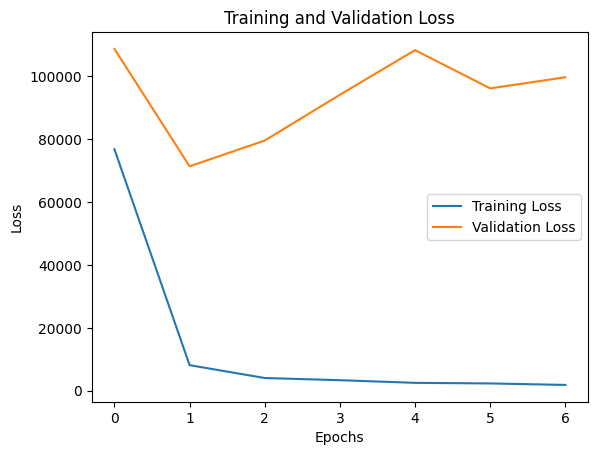

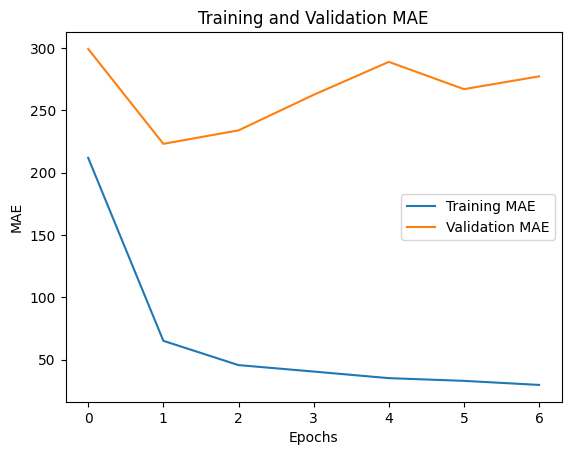

In [51]:
import matplotlib.pyplot as plt

# Loss graph
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MAE graph
plt.figure()
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()